In [1]:
import numpy as np
import sklearn
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
df.shape

(116039, 13)

In [4]:
df['type'].unique()

array([0, 1, 2, 3], dtype=int64)

In [5]:
# using np.ceil to round to
df['baths']=df['baths'].apply(np.ceil)

In [6]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)
df.drop(df.index[df['beds'] == 0], inplace = True)

In [7]:
df.head()

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,0,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,0,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,0,890,2,1.0,0,0,0,0,4,1,13,1
3,1800,1,2600,4,3.0,1,0,0,0,3,0,10,1
4,2640,2,982,2,2.0,0,1,0,0,4,2,34,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111851 entries, 0 to 116038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    111851 non-null  int64  
 1   type                     111851 non-null  int64  
 2   sqfeet                   111851 non-null  int64  
 3   beds                     111851 non-null  int64  
 4   baths                    111851 non-null  float64
 5   smoking_allowed          111851 non-null  int64  
 6   wheelchair_access        111851 non-null  int64  
 7   electric_vehicle_charge  111851 non-null  int64  
 8   comes_furnished          111851 non-null  int64  
 9   laundry_options          111851 non-null  int64  
 10  parking_options          111851 non-null  int64  
 11  state                    111851 non-null  int64  
 12  pets_allowed             111851 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 11.9 MB


In [10]:
x_data = df.drop(['type'],axis=1)
x_data.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,890,2,1.0,0,0,0,0,4,1,13,1
3,1800,2600,4,3.0,1,0,0,0,3,0,10,1
4,2640,982,2,2.0,0,1,0,0,4,2,34,1


In [11]:
y_data = df['type']

In [12]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access','electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state', 'pets_allowed'])
df.head()

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,0,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,0,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,0,890,2,1.0,0,0,0,0,4,1,13,1
3,1800,1,2600,4,3.0,1,0,0,0,3,0,10,1
4,2640,2,982,2,2.0,0,1,0,0,4,2,34,1


In [13]:
#Splitting the data set into Train set & Test set
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.25, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [14]:
X_test.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
107690,3.792932e-07,0.000143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.666667,0.888889,0.0
108467,5.414861e-07,0.000131,0.142857,0.142857,0.0,0.0,0.0,0.0,1.00,0.166667,0.629630,1.0
87504,3.233023e-07,0.000083,0.000000,0.000000,1.0,0.0,0.0,0.0,0.50,0.666667,0.148148,1.0
95313,9.662945e-07,0.000203,0.285714,0.142857,0.0,0.0,0.0,0.0,0.00,0.666667,0.037037,0.0
79612,4.984996e-07,0.000146,0.142857,0.142857,1.0,1.0,0.0,0.0,1.00,0.666667,0.074074,1.0


In [15]:
#the scaler model

scaler = StandardScaler()

#fitting and standardization

train_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)

In [16]:
#to store rmse values for different k
rmse_val = []
#try running from k=1 through 20 and record testing accuracy
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred=model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.49717580247285936
RMSE value for k =  2 is : 0.4608458069423517
RMSE value for k =  3 is : 0.4534193772546827
RMSE value for k =  4 is : 0.45285652585328096
RMSE value for k =  5 is : 0.4583703206540416
RMSE value for k =  6 is : 0.4629609364711456
RMSE value for k =  7 is : 0.4682293111905049
RMSE value for k =  8 is : 0.47283896902317585
RMSE value for k =  9 is : 0.4773659868182111
RMSE value for k =  10 is : 0.4818517369989226
RMSE value for k =  11 is : 0.4858124785877112
RMSE value for k =  12 is : 0.49019054237316284
RMSE value for k =  13 is : 0.4939444404869447
RMSE value for k =  14 is : 0.4981830777329927
RMSE value for k =  15 is : 0.5025396527518436
RMSE value for k =  16 is : 0.5066682276291038
RMSE value for k =  17 is : 0.5109240822794298
RMSE value for k =  18 is : 0.5144651334150119
RMSE value for k =  19 is : 0.5185278420975139
RMSE value for k =  20 is : 0.5220408435638136


<AxesSubplot:>

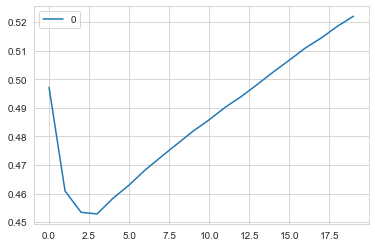

In [17]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [23]:
#Traiing
#Create KNN Classifier: k=0.4528
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
#Prediction
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([2, 3, 0, ..., 2, 0, 3], dtype=int64)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Rate : 90.2156420984873


In [29]:
#Import scikit-learn metrics module for accuracy calculation
#Calculate the confusion matrix, recall, percision and all over accuracy of the model
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[ 3935   212     1    77]
 [  349  4648   440   643]
 [    0   306  6268    62]
 [   83   448   115 10376]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4225
           1       0.83      0.76      0.79      6080
           2       0.92      0.94      0.93      6636
           3       0.93      0.94      0.94     11022

    accuracy                           0.90     27963
   macro avg       0.89      0.90      0.89     27963
weighted avg       0.90      0.90      0.90     27963

Accuracy Rate : 90.2156420984873


In [30]:
cf =confusion_matrix(y_pred, y_test, labels=[0,2,3,1])
print(confusion_matrix(y_pred, y_test, labels=[0,2,3,1]))

[[ 3935     0    83   349]
 [    1  6268   115   440]
 [   77    62 10376   643]
 [  212   306   448  4648]]


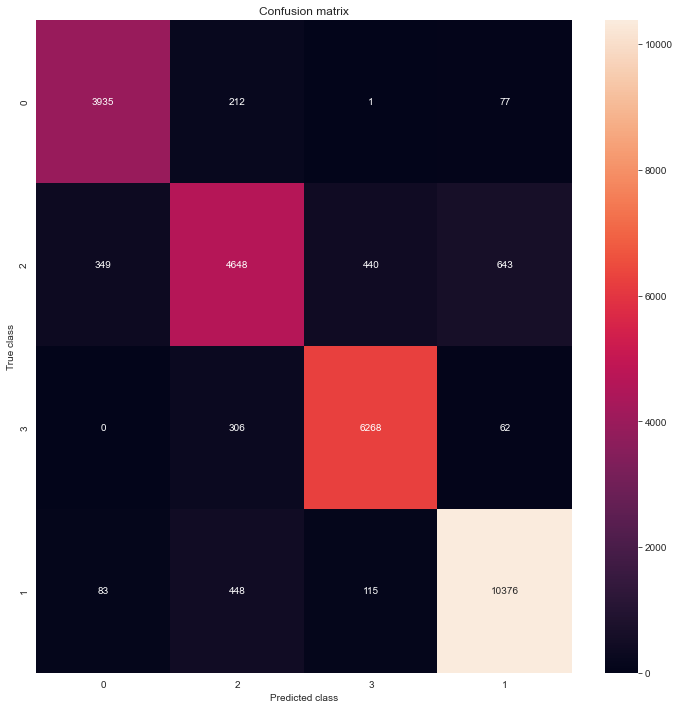

In [31]:
#confusion matrix creation
LABELS=['0','2','3','1']
conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



In [266]:
#Comparing Error rate with k-value
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

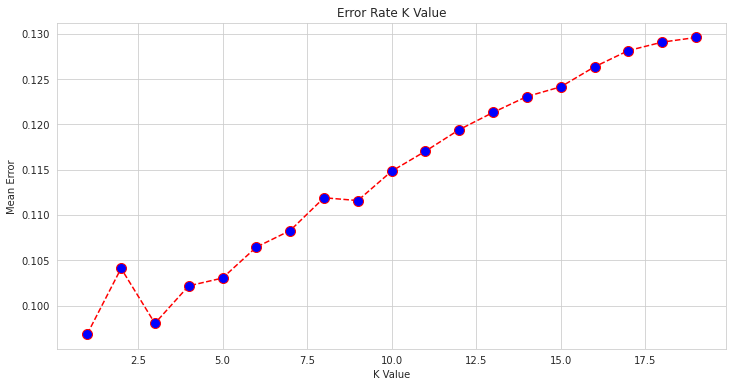

In [267]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')